In [1]:
import pandas as pd
import glob
from src import Utils
import shutil
from src import *

In [2]:
test_run12_images = glob.glob(r"datasets\AUV_datasets\Runs\run12_png\test\images\*.png")
test_run12_labels = glob.glob(r"datasets\AUV_datasets\Runs\run12_png\test\labels\*.txt")
assert len(test_run12_images) == len(test_run12_labels)

In [13]:
orig_RetinaNet_pred_pth = r"Z:\__AdvancedTechnologyBackup\04_ProjectData\Proj_GobyFinder\gobyfinder_yolov8\test_runs\detect\RetinaNet_YOLO_comparison\RetinaNET\GobyFinder_RetinaNet_predicitons_rename.xlsx"
lbl_pth_abs1 = r"Z:\__AdvancedTechnologyBackup\04_ProjectData\Proj_GobyFinder\gobyfinder_yolov8\test_runs\detect\RetinaNet_YOLO_comparison\YOLO\Run12_abs1_compare_retinanet_Labels.csv"
lbl_pth_abs2 = r"Z:\__AdvancedTechnologyBackup\04_ProjectData\Proj_GobyFinder\gobyfinder_yolov8\test_runs\detect\RetinaNet_YOLO_comparison\YOLO\Run12_abs2_compare_retinanet_Labels.csv"
pred_pth_Retina_all = r"Z:\__AdvancedTechnologyBackup\04_ProjectData\Proj_GobyFinder\gobyfinder_yolov8\test_runs\detect\RetinaNet_YOLO_comparison\RetinaNET\GobyFinder_RetinaNet_predicitons_yolo_all.csv"
pred_pth_YOLO_abs1 = r"Z:\__AdvancedTechnologyBackup\04_ProjectData\Proj_GobyFinder\gobyfinder_yolov8\test_runs\detect\RetinaNet_YOLO_comparison\YOLO\Run12_abs1_compare_retinanet_predictions.csv"
pred_pth_YOLO_abs2 = r"Z:\__AdvancedTechnologyBackup\04_ProjectData\Proj_GobyFinder\gobyfinder_yolov8\test_runs\detect\RetinaNet_YOLO_comparison\YOLO\Run12_abs2_compare_retinanet_predictions.csv"


In [ ]:
## Labels
lbl_df_abs1 = pd.read_csv(lbl_pth_abs1, index_col=0)
lbl_df_abs2 = pd.read_csv(lbl_pth_abs2, index_col=0)

In [ ]:
## YOLO Scores Sheets for ABISS1
pred_df_YOLO_abs1 = pd.read_csv(pred_pth_YOLO_abs1, index_col=0)
scores_df_YOLO_abs1 = reports().scores_df(lbl_df_abs1, pred_df_YOLO_abs1, iou_tp = 0.5)
recY1, precY1, APY1 = reports().calc_AP(scores_df_YOLO_abs1, 'AUC')

In [6]:
## RetinaNet predictions
pred_df_Retina_all = pd.read_csv(pred_pth_Retina_all, index_col=0)
## Filter out really small boxes
pred_df_Retina_all_f = pred_df_Retina_all[(pred_df_Retina_all.h>=0.001) & (pred_df_Retina_all.w>=0.001)]
## Filter only the images that are in the ABISS1 test set
pred_df_Retina_abs1 = pred_df_Retina_all_f[pred_df_Retina_all_f.Filename.isin(lbl_df_abs1.Filename)]
## Filter only the images that are in the ABISS2 test set
pred_df_Retina_abs2 = pred_df_Retina_all_f[pred_df_Retina_all_f.Filename.isin(lbl_df_abs2.Filename)]

In [ ]:
## RetinaNet Scores Sheets
scores_df_Retina_abs1 = reports().scores_df(lbl_df_abs1, pred_df_Retina_abs1, iou_tp = 0.4)
scores_df_Retina_abs2 = reports().scores_df(lbl_df_abs2, pred_df_Retina_abs2, iou_tp = 0.4)

# Recall, precision, and AP scores for RetinaNet
recR1, precR1, APR1 = reports().calc_AP(scores_df_Retina_abs1, 'AUC')
recR2, precR2, APR2 = reports().calc_AP(scores_df_Retina_abs2, 'AUC')

In [16]:
## YOLO Scores Sheets for ABISS2
pred_df_YOLO_abs2 = pd.read_csv(pred_pth_YOLO_abs2, index_col=0)
scores_df_YOLO_abs2 = reports().scores_df(lbl_df_abs2, pred_df_YOLO_abs2, iou_tp = 0.5)
# Recall, precision, and AP scores for YOLO
recY2, precY2, APY2 = reports().calc_AP(scores_df_YOLO_abs2, 'AUC')

In [17]:
## YOLO predictions
pred_YOLO_all = pd.concat([pred_df_YOLO_abs1, pred_df_YOLO_abs2], axis=0)

In [9]:
def calculate_f1(scores_df):
    # Calculate F1 scores
    return 2 * (scores_df['Precision'] * scores_df['Recall']) / (scores_df['Precision'] + scores_df['Recall'])

In [10]:
# Find the maximum F1 score RetinaNet ABISS1
calculate_f1(scores_df_Retina_abs1).max()

0.14622138344137195

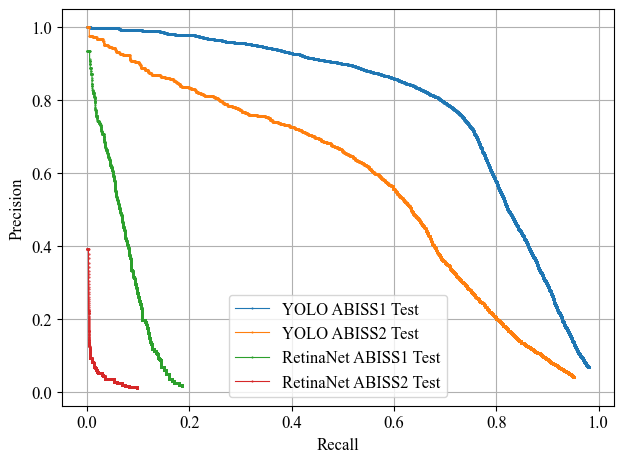

In [18]:
label1 = "YOLO ABISS1 Test"
label2 = "YOLO ABISS2 Test"
label3 = "RetinaNet ABISS1 Test"
label4 = "RetinaNet ABISS2 Test"
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # Set the font size for better readability
plt.plot(recY1, precY1, marker='.', label=f"{label1}", drawstyle="steps", linewidth=.8, markersize=1)
plt.plot(recY2, precY2, marker='.', label=f"{label2}", drawstyle="steps", linewidth=.8, markersize=1)
plt.plot(recR1[4:], precR1[4:], marker='.', label=f"{label3}", drawstyle="steps", linewidth=.8, markersize=1)
plt.plot(recR2[4:], precR2[4:], marker='.', label=f"{label4}", drawstyle="steps", linewidth=.8, markersize=1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
# Improve the layout
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()
# return AP

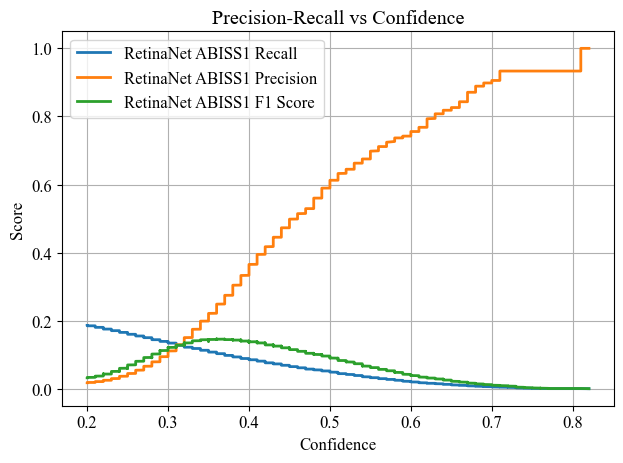

In [39]:
import matplotlib.pyplot as plt

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # Set the font size for better readability
F1R1 = calculate_f1(scores_df_Retina_abs1)
# Plot the Precision-Recall curve
plt.plot(scores_df_Retina_abs1.conf, recR1, label="RetinaNet ABISS1 Recall", linewidth=2)
plt.plot(scores_df_Retina_abs1.conf, precR1, label="RetinaNet ABISS1 Precision", linewidth=2)
plt.plot(scores_df_Retina_abs1.conf, F1R1, label="RetinaNet ABISS1 F1 Score", linewidth=2)
plt.xlabel('Confidence') 
plt.ylabel('Score') 
plt.title('Precision-Recall vs Confidence')
plt.legend()

# Improve the layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

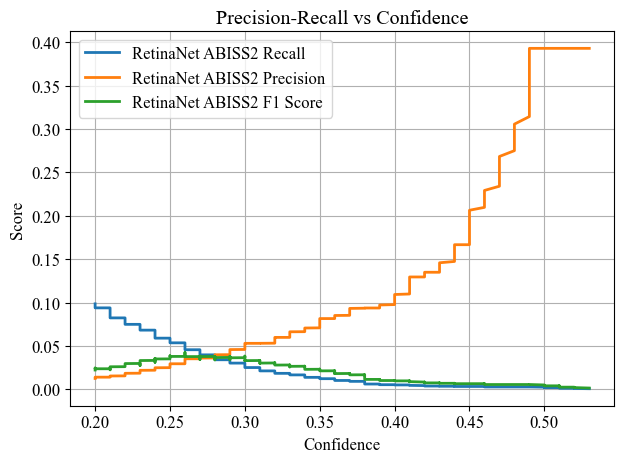

In [71]:
import matplotlib.pyplot as plt

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # Set the font size for better readability

# Plot the Precision-Recall curve
trm = 10
x = scores_df_Retina_abs2.conf
recall = recR2
precision = precR2
f1 = calculate_f1(scores_df_Retina_abs2)
plt.plot(x[trm:], recall[trm:], label="RetinaNet ABISS2 Recall", linewidth=2)
plt.plot(x[trm:], precision[trm:], label="RetinaNet ABISS2 Precision", linewidth=2)
plt.plot(x[trm:], f1[trm:], label="RetinaNet ABISS2 F1 Score", linewidth=2)
plt.xlabel('Confidence') 
plt.ylabel('Score') 
plt.title('Precision-Recall vs Confidence')
plt.legend()

# Improve the layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

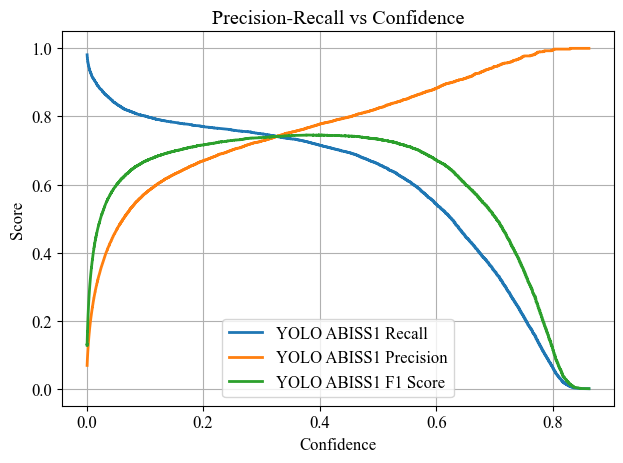

In [12]:
import matplotlib.pyplot as plt

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # Set the font size for better readability

# Plot the Precision-Recall curve
trm = 0
x = scores_df_YOLO_abs1.conf
recall = recY1
precision = precY1
f1 = calculate_f1(scores_df_YOLO_abs1)
plt.plot(x[trm:], recall[trm:], label="YOLO ABISS1 Recall", linewidth=2)
plt.plot(x[trm:], precision[trm:], label="YOLO ABISS1 Precision", linewidth=2)
plt.plot(x[trm:], f1[trm:], label="YOLO ABISS1 F1 Score", linewidth=2)
plt.xlabel('Confidence') 
plt.ylabel('Score') 
plt.title('Precision-Recall vs Confidence')
plt.legend()

# Improve the layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

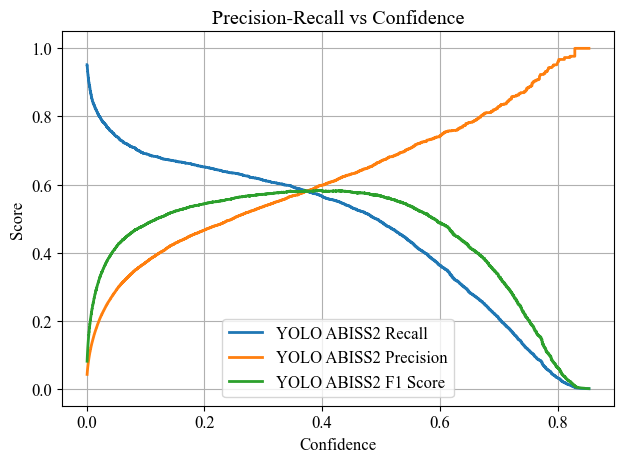

In [19]:
import matplotlib.pyplot as plt

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # Set the font size for better readability

# Plot the Precision-Recall curve
trm = 0
x = scores_df_YOLO_abs2.conf
recall = recY2
precision = precY2
f1 = calculate_f1(scores_df_YOLO_abs2)
plt.plot(x[trm:], recall[trm:], label="YOLO ABISS2 Recall", linewidth=2)
plt.plot(x[trm:], precision[trm:], label="YOLO ABISS2 Precision", linewidth=2)
plt.plot(x[trm:], f1[trm:], label="YOLO ABISS2 F1 Score", linewidth=2)
plt.xlabel('Confidence') 
plt.ylabel('Score') 
plt.title('Precision-Recall vs Confidence')
plt.legend()

# Improve the layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

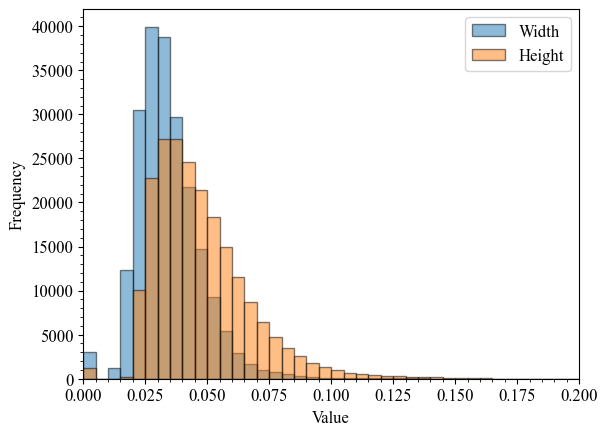

In [135]:
import matplotlib.pyplot as plt

# Extract the width and height columns from pred_df_Retina_all
fish_w = pred_df_Retina_all['w']
fish_h = pred_df_Retina_all['h']

# fish_w = pred_YOLO_all['w']
# fish_h = pred_YOLO_all['h']


# Create the histogram with outlines
bins = np.arange(0, 0.250, 0.005)
plt.hist(fish_w, bins=bins, alpha=0.5, label='Width', edgecolor='black')
plt.hist(fish_h, bins=bins, alpha=0.5, label='Height', edgecolor='black')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.xlim(0, 0.20)

# Add minor ticks
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.005))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1000))

# Show the plot
plt.show()

## Cleaning RetinaNet output

In [ ]:
import re
import pandas as pd

# Load the RetinaNet output
df_retinaNet = pd.read_excel(orig_RetinaNet_pred_pth, index_col=0)
# Filtering to only the RetiinaNet predictions
df_retinaNet = df_retinaNet[df_retinaNet.status.isin(["TP", "FP"])]
# df_retinaNet[(df_retinaNet.Width>=5) & (df_retinaNet.Height>=5)]
# Extract numbers from the string tensor
def extract_tensor(tensor_str):
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", tensor_str)
    return list(map(float, numbers))[:4]

# Rename columns and add new ones to match format of YOLO prediction output
df_retinaNet = df_retinaNet.rename(columns={'image_name': 'Filename', 'score': 'conf', 'Width': 'imw', 'Height': 'imh'})
df_retinaNet['names'] = 'goby'
df_retinaNet['cls'] = 0

# Apply the extraction function and calculate new columns
# xyxy = [xmin, ymin, xmax, ymax]
df_retinaNet['xyxy'] = df_retinaNet['box'].apply(extract_tensor)
df_retinaNet['y1'] = df_retinaNet['xyxy'].apply(lambda box: (box[1] + box[3]) / 2 )
df_retinaNet['y'] = df_retinaNet.y1/df_retinaNet.imh
df_retinaNet['x1'] = df_retinaNet['xyxy'].apply(lambda box: (box[0] + box[2]) / 2)
df_retinaNet['x'] = df_retinaNet.x1/df_retinaNet.imw
df_retinaNet['h1'] = df_retinaNet['xyxy'].apply(lambda box: (box[3] - box[1]) )
df_retinaNet['h'] = df_retinaNet.h1/df_retinaNet.imh
df_retinaNet['w1'] = df_retinaNet['xyxy'].apply(lambda box: (box[2] - box[0]) )
df_retinaNet['w'] = df_retinaNet.w1/df_retinaNet.imw

# xyxy = [ymin, xmin, ymax, xmax]
# df_retinaNet['xyxy'] = df_retinaNet['box'].apply(extract_tensor)
# df_retinaNet['x1'] = df_retinaNet['xyxy'].apply(lambda box: (box[1] + box[3]) / 2 )
# df_retinaNet['x'] = df_retinaNet.x1/df_retinaNet.imw
# df_retinaNet['y1'] = df_retinaNet['xyxy'].apply(lambda box: (box[0] + box[2]) / 2)
# df_retinaNet['y'] = df_retinaNet.y1/df_retinaNet.imh
# df_retinaNet['w1'] = df_retinaNet['xyxy'].apply(lambda box: (box[3] - box[1]) )
# df_retinaNet['w'] = df_retinaNet.w1/df_retinaNet.imw
# df_retinaNet['h1'] = df_retinaNet['xyxy'].apply(lambda box: (box[2] - box[0]) )
# df_retinaNet['h'] = df_retinaNet.h1/df_retinaNet.imh

# Add fish_id and detect_id columns
df_retinaNet['fish_id'] = df_retinaNet.groupby('Filename').cumcount()
df_retinaNet['detect_id'] = df_retinaNet.Filename + "_" + df_retinaNet.fish_id.astype(str)

# Redefine the columns to keep in the dataframe
columns = ['Filename', 'names', 'cls', 'x', 'y', 'w', 'h', 'conf', 'imh', 'imw', 'detect_id', 'xyxy']
df_retinaNet = df_retinaNet[columns]

# Filter out rows where height is zero
# df_retinaNet = df_retinaNet[df_retinaNet.h >= 0.001]

# Save the cleaned dataframe to CSV files
df_retinaNet.to_csv(pred_pth_Retina_all)